# Get metrics and Plot

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from lib.eval import *
import numpy as np

In [2]:
# Original
log_dir = "logs/NN_train_seed0_lr0.000227_bs_1_Mon May  8 18:23:51 2023"
# transfer learning
# log_dir = "logs/NN_transfer_seed0_lr0.000227_bs_1_Fri May 19 06:51:23 2023"

evaluator = Evaluator(log_dir)

In [3]:
# train_non_mae, train_nmae, train_r = evaluator.get_metrics(evaluator.train_loader)
# valid_non_mae, valid_nmae, valid_r = evaluator.get_metrics(evaluator.val_loader)
test_non_mae, test_nmae, test_r = evaluator.get_metrics(evaluator.test_loader)
# train_r = train_r**2
# valid_r = valid_r**2
test_r = test_r**2

  7%|▋         | 26/362 [00:50<37:42,  6.73s/it]

In [4]:
dir = "../../notebooks/metrics/"
# np.save(dir+"DNN_train_MAE.npy", train_non_mae)
# np.save(dir+"DNN_train_NMAE.npy", train_nmae)
# np.save(dir+"DNN_train_R2.npy", train_r)
# np.save(dir+"DNN_valid_MAE.npy", valid_non_mae)
# np.save(dir+"DNN_valid_NMAE.npy", valid_nmae)
# np.save(dir+"DNN_valid_R2.npy", valid_r)
np.save(dir+"DNN_test_MAE.npy", test_non_mae)
np.save(dir+"DNN_test_NMAE.npy", test_nmae)
np.save(dir+"DNN_test_R2.npy", test_r)

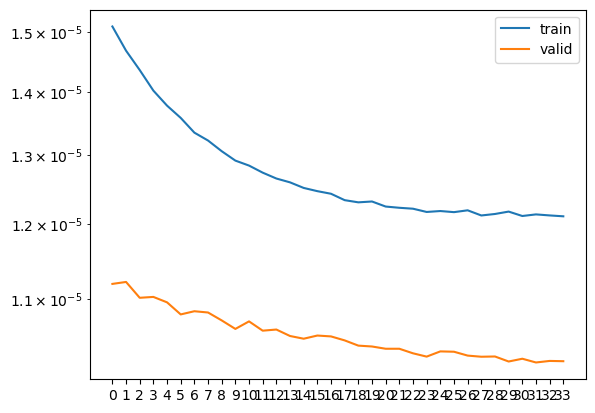

In [4]:
# train_values, valid_values = evaluator.get_loss()

# plt.plot(train_values, label="train")
# plt.plot(valid_values, label="valid")
# plt.xticks(np.arange(len(valid_values)))
# plt.yscale("log")
# plt.legend()
# plt.show()

# train_values, valid_values = evaluator.get_loss("r2")
step_size = len(evaluator.train_loader)
train_event_file = sorted(glob.glob(os.path.join(
    evaluator.dirpath, "runs/train/events.out.tfevents*")), key=os.path.getctime)[-1]
valid_event_file = sorted(glob.glob(os.path.join(
    evaluator.dirpath, "runs/valid/events.out.tfevents*")), key=os.path.getctime)[-1]
train_acc = EventAccumulator(train_event_file)
valid_acc = EventAccumulator(valid_event_file)
train_acc.Reload()
valid_acc.Reload()

valid_values = [s.value for s in valid_acc.Scalars(type)]
n_epochs = len(valid_values)

# Change each iteration to epochs
train_values = np.array([s.value for s in train_acc.Scalars(type)])
max_n = min(len(train_values) // step_size, n_epochs)
train_values = train_values[:max_n * step_size]
valid_values = valid_values[:max_n]
train_values = train_values.reshape(-1, step_size).mean(axis=1)


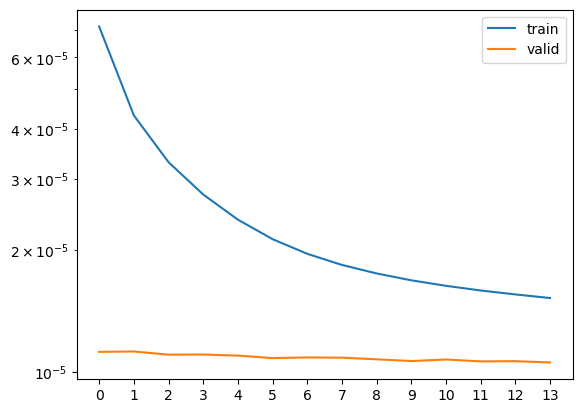

In [6]:
train_values, valid_values = evaluator.get_loss()
plt.plot(train_values, label="train")
plt.plot(valid_values, label="valid")
plt.xticks(np.arange(len(valid_values)))
plt.yscale("log")
plt.legend()

dir = "../../notebooks/metrics/"
plt.savefig(dir+"DNN_training_loss.png")
plt.show()

In [13]:
# non_mae = np.load("../../notebooks/metrics/MAE_mlp.npy")
# nmae = np.load("../../notebooks/metrics/NMAE_mlp.npy")
# r = np.load("../../notebooks/metrics/r2_mlp.npy")